# Assignment 2 for AI externship
**/Krish Bagga/**

#### Task - 1

Read the dataset and do data pre-processing

In [3]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the dataset using the compression zip
df = pd.read_csv('/content/drug_classification.zip',compression='zip')

In [4]:
# checking first 5 observations
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
# obtaining descriptive statistics for df
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
# check if there are null values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
# checking for different categories in output
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [8]:
# finding the count of observations based on unique values in Drug
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [9]:
# checking for different categories in Sex
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [10]:
# finding the count of observations based on unique values in Sex
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [11]:
# checking for different categories in Cholesterol
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [12]:
# finding the count of observations based on unique values in Cholesterol
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [13]:
# checking for different categories in BP
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [14]:
# finding the count of observations based on unique values in BP
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

Correlation

In [15]:
# checking correlation of variables
df.corr()

<ipython-input-15-ad7e7baaa718>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<ipython-input-16-86603313eb7f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot =True)


<Axes: >

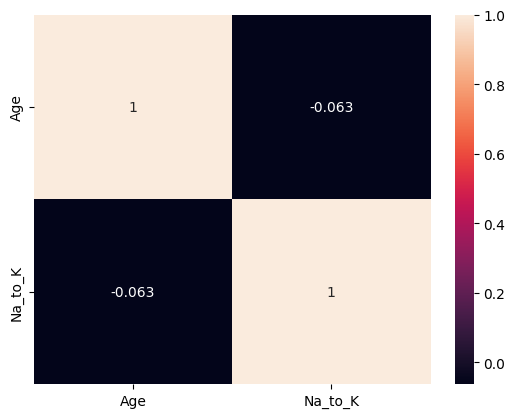

In [16]:
# correlation heatmap
sns.heatmap(df.corr(),annot =True)

Visualisation

In [17]:
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-18-43fdfa5e2da3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

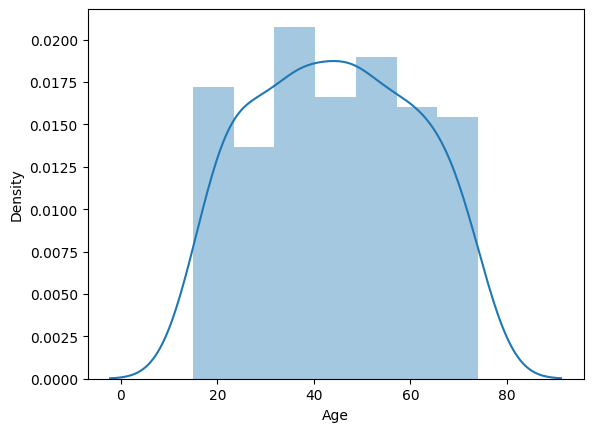

In [18]:
# distribution plot of Age
sns.distplot(df.Age)

<ipython-input-19-2d54f391c5ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Na_to_K)


<Axes: xlabel='Na_to_K', ylabel='Density'>

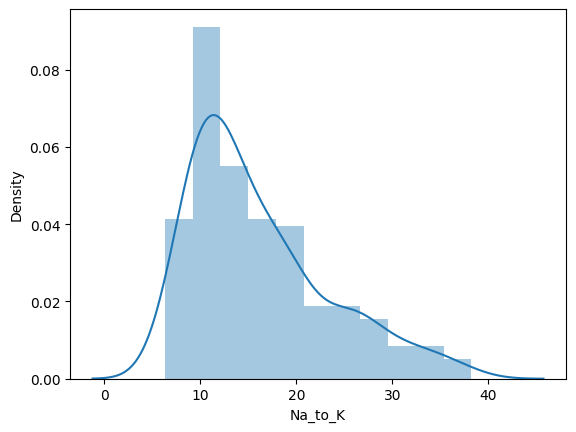

In [19]:
# distribution plot of Na_to_K
sns.distplot(df.Na_to_K)

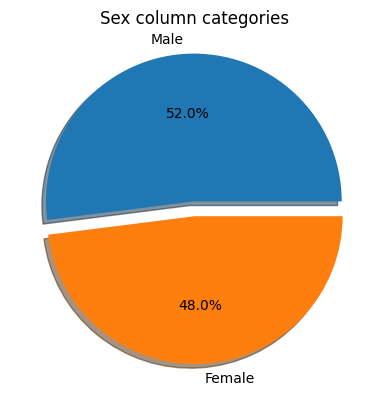

In [20]:
# pie chart of categorical distribution of Sex column
plt.pie(df.Sex.value_counts(),[0.1,0],labels=['Male','Female'],autopct = "%1.1f%%",shadow=True)
plt.title('Sex column categories')
plt.show()

<Axes: ylabel='Cholesterol'>

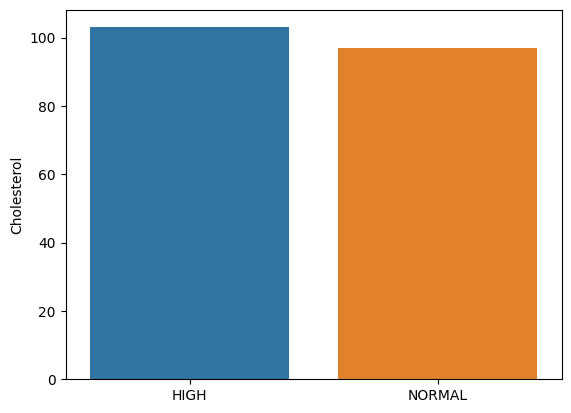

In [21]:
# barplot of categorical distribution of Cholesterol column
sns.barplot(x=df.Cholesterol.value_counts().index,y=df.Cholesterol.value_counts())

<Axes: ylabel='BP'>

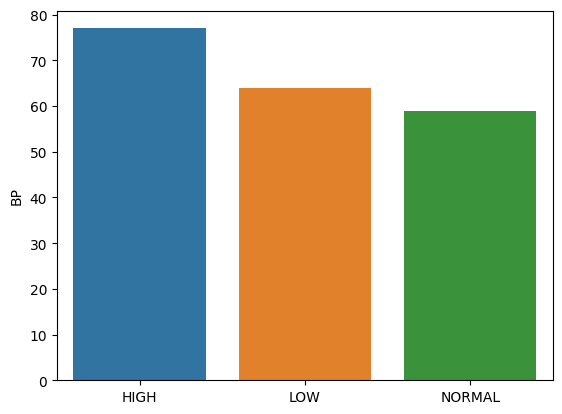

In [22]:
# barplot of categorical distribution of BP column
sns.barplot(x=df.BP.value_counts().index,y=df.BP.value_counts())

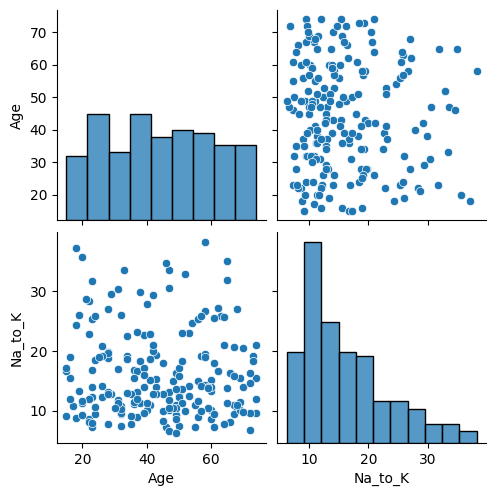

In [23]:
# multivariate analysis of df
sns.pairplot(df)

Outlier detection using Z score

<Axes: >

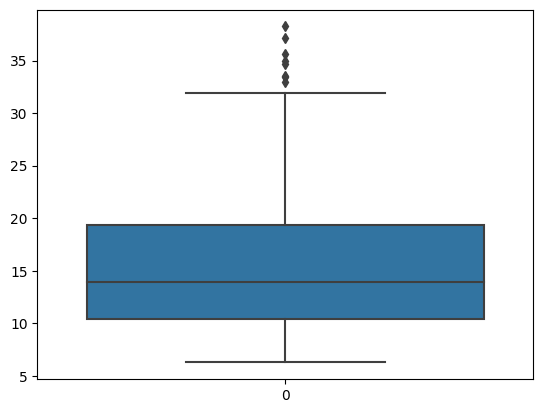

In [24]:
# boxplot of Na_to_K
sns.boxplot(df.Na_to_K)

In [25]:
# importing required library
from scipy import stats

# getting z score 
z_score = stats.zscore(df.Na_to_K)
z_score

0      1.286522
1     -0.415145
2     -0.828558
3     -1.149963
4      0.271794
         ...   
195   -0.626917
196   -0.565995
197   -0.859089
198   -0.286500
199   -0.657170
Name: Na_to_K, Length: 200, dtype: float64

<Axes: >

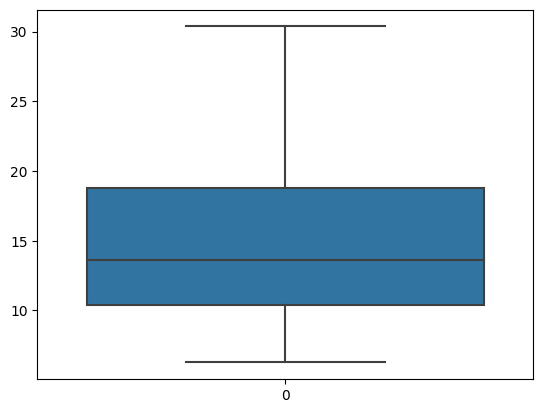

In [26]:
# removing outliers
df_z = df[np.abs(z_score)<=2]

# visualising
sns.boxplot(df_z.Na_to_K)

In [27]:
# splitting dataframe into x and y
X = pd.get_dummies(df_z.drop('Drug',axis=1))
y = pd.get_dummies(df_z['Drug'])

In [28]:
# checking first 5 observations of X
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [29]:
# checking first 5 observations of y
y.head()

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0


In [30]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [31]:
# checking shape of the training data
x_train.shape, y_train.shape

((151, 9), (151, 5))

In [32]:
# checking shape of test data
x_test.shape, y_test.shape

((38, 9), (38, 5))

#### Task - 2

Build the ANN model with (input layer, min 3 hidden layers & output layer)

In [33]:
# import the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN Model
model = Sequential()
model.add(Dense(12,input_dim=9,activation='relu')) # input layer
model.add(Dense(128,activation='relu')) # 1st hidden layer
model.add(Dense(64,activation='relu')) # 2nd hidden layer
model.add(Dense(32,activation='relu')) # 3rd hidden layer
model.add(Dense(24,activation='relu')) # 4th hidden layer
model.add(Dense(5,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                120       
                                                                 
 dense_1 (Dense)             (None, 128)               1664      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 24)                792       
                                                                 
 dense_5 (Dense)             (None, 5)                 125       
                                                                 
Total params: 13,037
Trainable params: 13,037
Non-traina

In [35]:
# fit the model on the data
history = model.fit(x_train,y_train,epochs=60,batch_size=5,validation_data=(x_test,y_test))

Epoch 1/60
31/31 [==============================] - 2s 11ms/step - loss: 1.1621 - accuracy: 0.5629 - val_loss: 1.3675 - val_accuracy: 0.3684
Epoch 2/60
31/31 [==============================] - 0s 4ms/step - loss: 1.1347 - accuracy: 0.5430 - val_loss: 1.3588 - val_accuracy: 0.3684
Epoch 3/60
31/31 [==============================] - 0s 3ms/step - loss: 1.0394 - accuracy: 0.5828 - val_loss: 1.4341 - val_accuracy: 0.3947
Epoch 4/60
31/31 [==============================] - 0s 4ms/step - loss: 1.0596 - accuracy: 0.5166 - val_loss: 1.3837 - val_accuracy: 0.4211
Epoch 5/60
31/31 [==============================] - 0s 4ms/step - loss: 1.0412 - accuracy: 0.5762 - val_loss: 1.2823 - val_accuracy: 0.4211
Epoch 6/60
31/31 [==============================] - 0s 3ms/step - loss: 1.0272 - accuracy: 0.5828 - val_loss: 1.3379 - val_accuracy: 0.4211
Epoch 7/60
31/31 [==============================] - 0s 4ms/step - loss: 0.9875 - accuracy: 0.5960 - val_loss: 1.3730 - val_accuracy: 0.4211
Epoch 8/60
31/31 [=

In [36]:
# evaluate the model
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.6234 - accuracy: 0.7368


[0.6234157681465149, 0.7368420958518982]

Visualise accuracy and loss

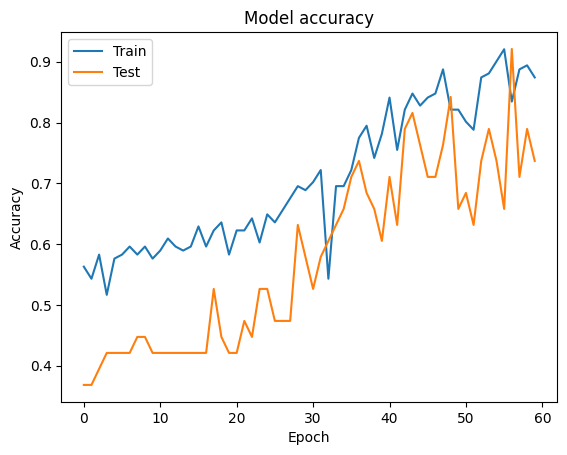

In [37]:
# import required library
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

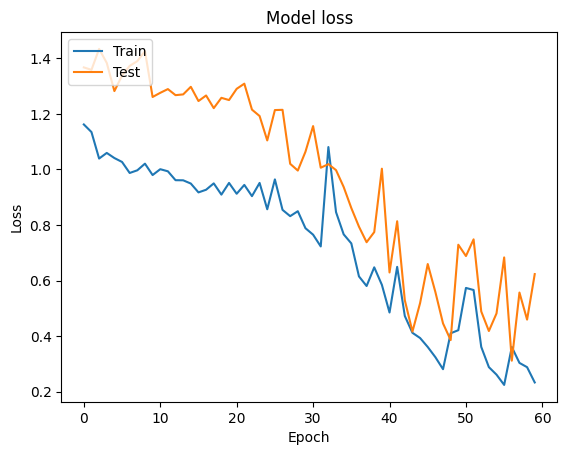

In [38]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Task - 3

Test the model with random data

In [39]:
# testing the model with random values 

#selecting random rows from the dataframe
random_data = df_z.sample(frac=0.3)

# one hot encoding and splitting into x, y
X_random = pd.get_dummies(df_z.drop('Drug',axis=1))
y_random = pd.get_dummies(df_z['Drug'])

# evaluating model based on the random data
model.evaluate(X_random, y_random)

6/6 [==============================] - 0s 4ms/step - loss: 0.3454 - accuracy: 0.8571


[0.34541112184524536, 0.8571428656578064]

In [40]:
# making predictions using random values
output_probs = model.predict([[52,17.6969,1,0,0,1,0,0,1]])
predicted_labels = np.argmax(output_probs, axis=1)
predicted_labels

1/1 [==============================] - 0s 118ms/step


array([0])